In [1]:
import sys
import datetime

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

from src.tree import *
from src.emit_baseline import *

# plotting parameters
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3', 'm'] * 2
markersize = 6
linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted'] * 4
linewidth = 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3, 
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(color=color_list, linestyle=linestyle_list),
 'font.size': 16,
 'font.family': 'serif'}
plt.rcParams.update(cdds_params)

node_times = [2020, 2030, 2060, 2100, 2150, 2200]
x_label = 'Year'

# make base filename
today = datetime.datetime.now()
year = str(today.year)
day = str(today.day)
month = str(today.month)

basefile = ''.join(["/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/docs/figdump/", month, '-', day, '-', year, '-'])

In [2]:
t = TreeModel(decision_times=[0,10,40,80,130,180,230], prob_scale=1.0)

bau5 = BPWEmissionBaseline(tree=t, baseline_num=5)
bau5.baseline_emission_setup()

bau4 = BPWEmissionBaseline(tree=t, baseline_num=4)
bau4.baseline_emission_setup()

bau3 = BPWEmissionBaseline(tree=t, baseline_num=3)
bau3.baseline_emission_setup()

bau2 = BPWEmissionBaseline(tree=t, baseline_num=2)
bau2.baseline_emission_setup()

bau1 = BPWEmissionBaseline(tree=t, baseline_num=1)
bau1.baseline_emission_setup()

bau5.baseline_gtco2[1], bau4.baseline_gtco2[1], bau3.baseline_gtco2[1], bau2.baseline_gtco2[1], bau1.baseline_gtco2[1]

(55.296583, 45.167913, 52.847359, 43.476063, 34.734424)

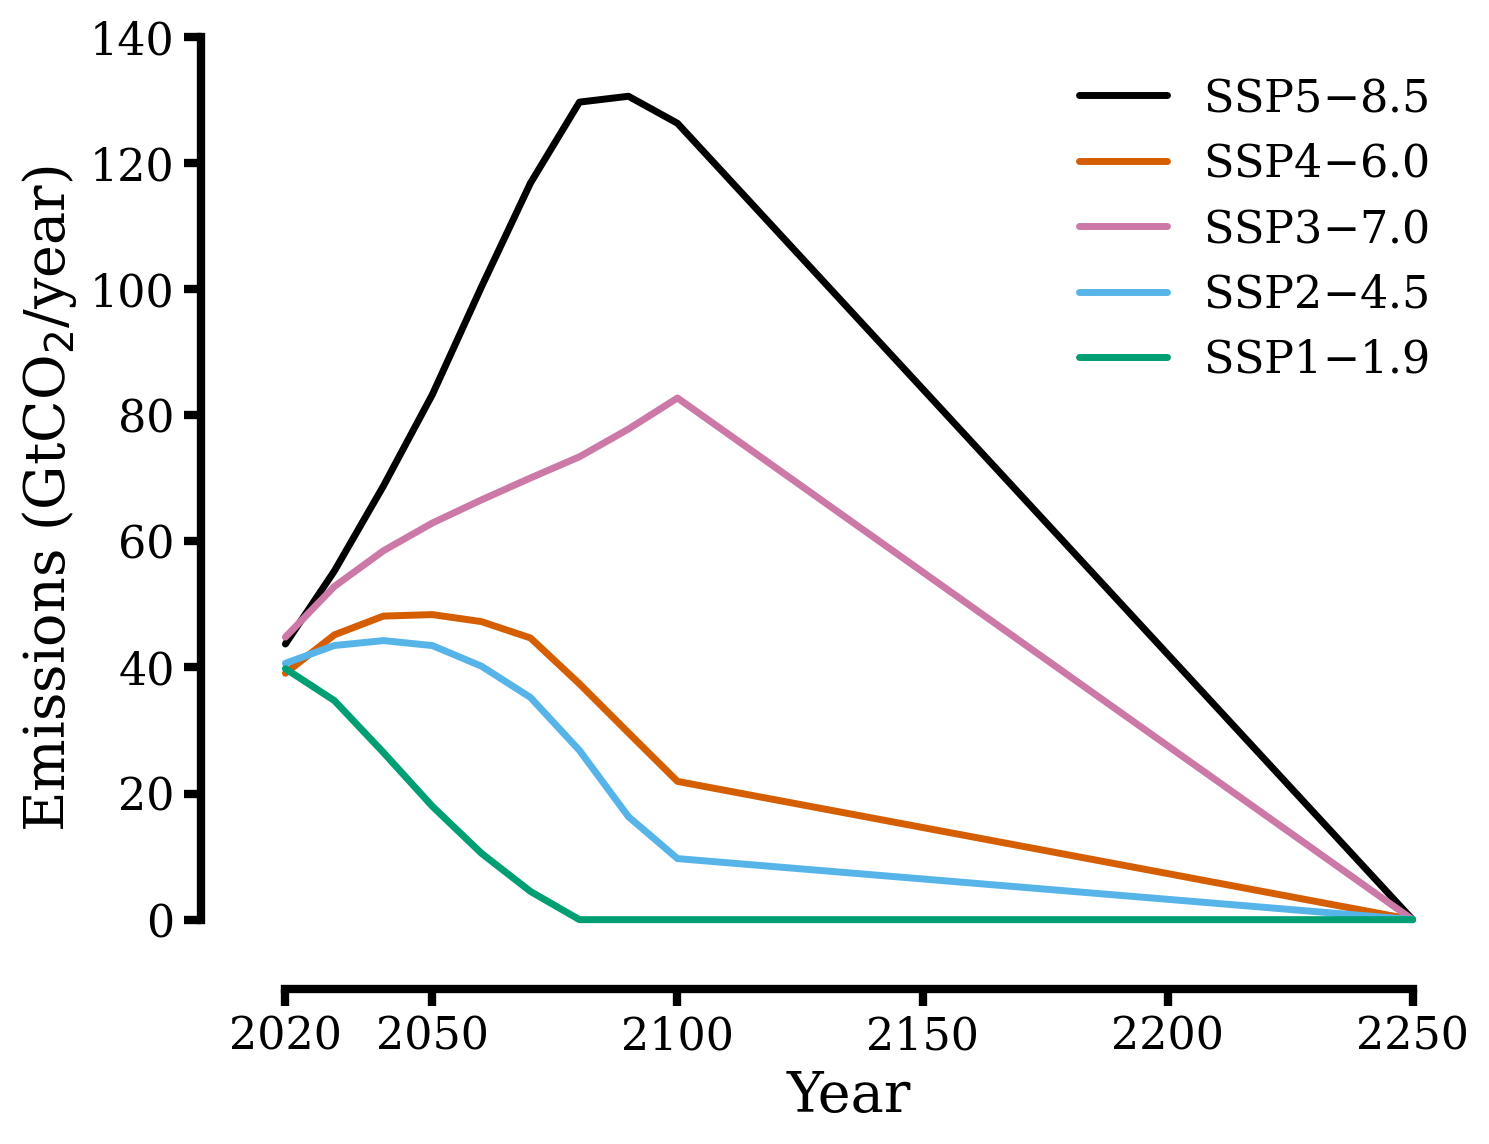

In [4]:
fig, ax = plt.subplots(1, figsize=(8,6))

t = np.arange(2020, 2260, 10)

ssp5_cind = 0
ssp4_cind = 6
ssp3_cind = 7
ssp2_cind = 2
ssp1_cind = 3

ax.plot(t, bau5.baseline_gtco2, label="SSP5$-$8.5", color=color_list[ssp5_cind], linestyle='solid')
ax.plot(t, bau4.baseline_gtco2, label="SSP4$-$6.0", color=color_list[ssp4_cind], linestyle='solid')
ax.plot(t, bau3.baseline_gtco2, label="SSP3$-$7.0", color=color_list[ssp3_cind], linestyle='solid')
ax.plot(t, bau2.baseline_gtco2, label="SSP2$-$4.5", color=color_list[ssp2_cind], linestyle='solid')
ax.plot(t, bau1.baseline_gtco2, label="SSP1$-$1.9", color=color_list[ssp1_cind], linestyle='solid')

ax.set_ylabel("Emissions (GtCO$_2$/year)")
ax.set_xlabel("Year")
ax.legend()

ax.set_xticks([2020, 2050, 2100, 2150, 2200, 2250])
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140])

sns.despine(offset=10, trim=True)
#ax.vlines(2100, 0, 140)

fig.savefig(''.join([basefile, 'baselines.png']), bbox_inches='tight', dpi=400)

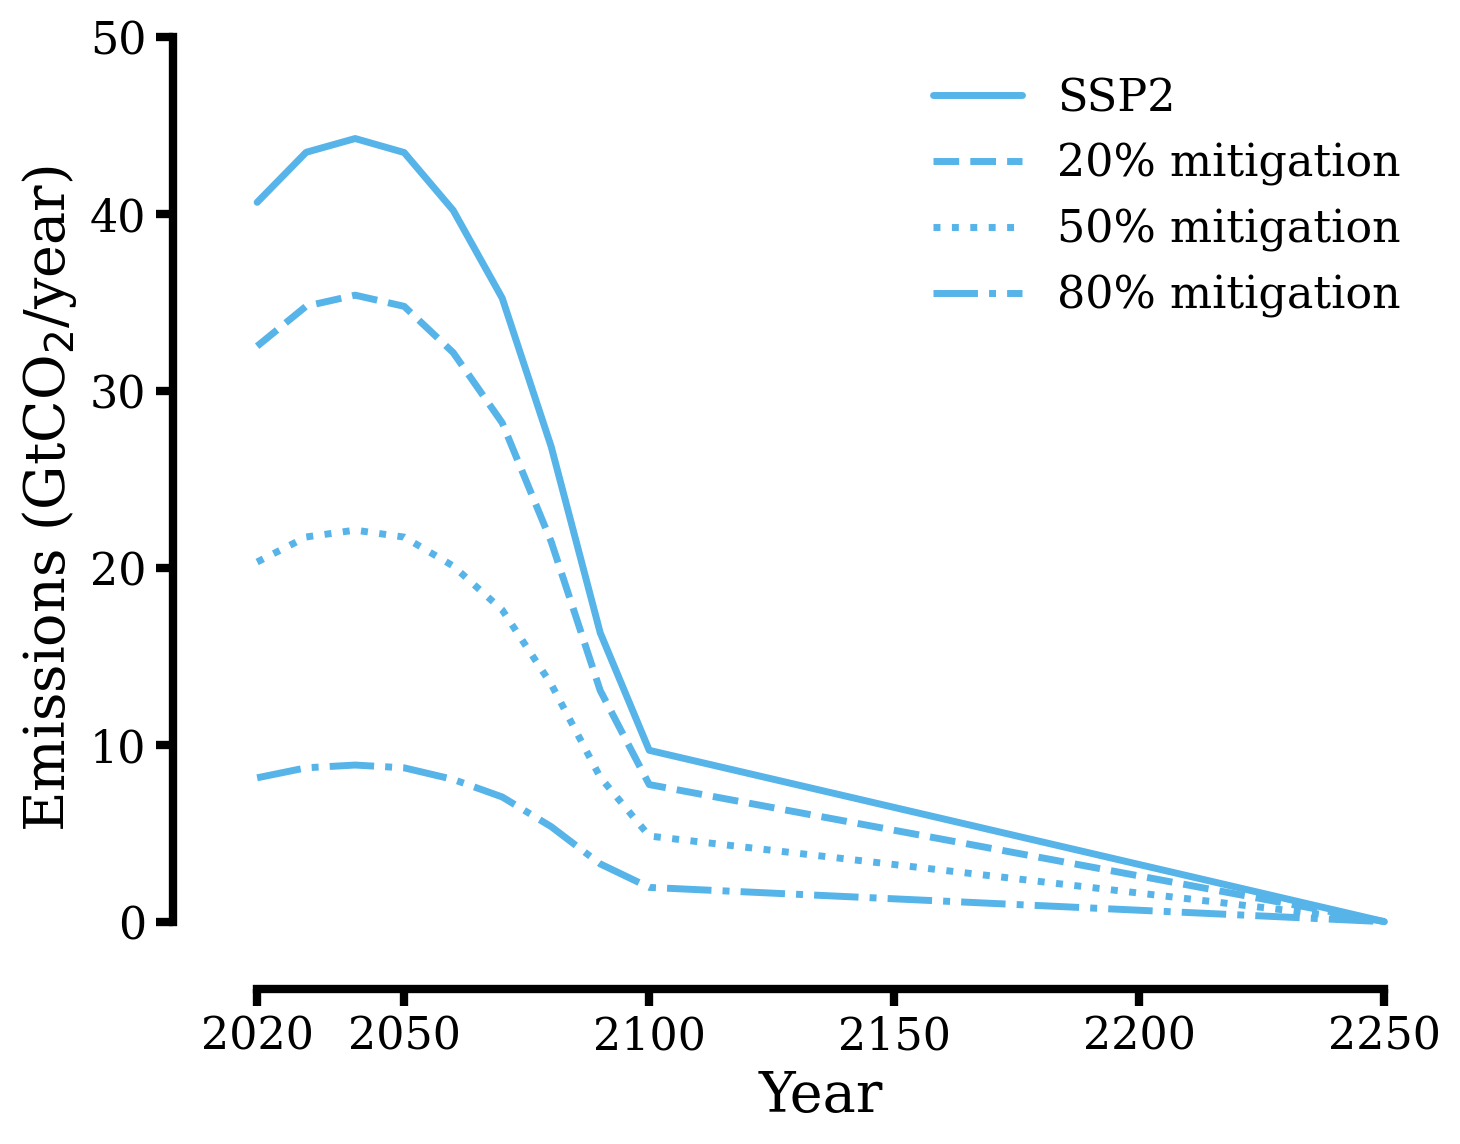

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

t = np.arange(2020, 2260, 10)

ssp5_cind = 0
ssp4_cind = 6
ssp3_cind = 7
ssp2_cind = 2
ssp1_cind = 3

ax.plot(t, bau2.baseline_gtco2, label="SSP2", color=color_list[ssp2_cind], linestyle='solid')
ax.plot(t, bau2.baseline_gtco2 * (1-0.2), label="20% mitigation", color=color_list[ssp2_cind], linestyle='dashed')
ax.plot(t, bau2.baseline_gtco2 * (1-0.5), label="50% mitigation", color=color_list[ssp2_cind], linestyle='dotted')
ax.plot(t, bau2.baseline_gtco2 * (1-0.8), label="80% mitigation", color=color_list[ssp2_cind], linestyle='dashdot')


ax.set_ylabel("Emissions (GtCO$_2$/year)")
ax.set_xlabel("Year")
ax.legend()

ax.set_xticks([2020, 2050, 2100, 2150, 2200, 2250])
ax.set_yticks([0, 10, 20, 30, 40, 50])

sns.despine(offset=10, trim=True)
#ax.vlines(2100, 0, 140)

#fig.savefig(''.join([basefile, 'baselines.png']), bbox_inches='tight', dpi=400)

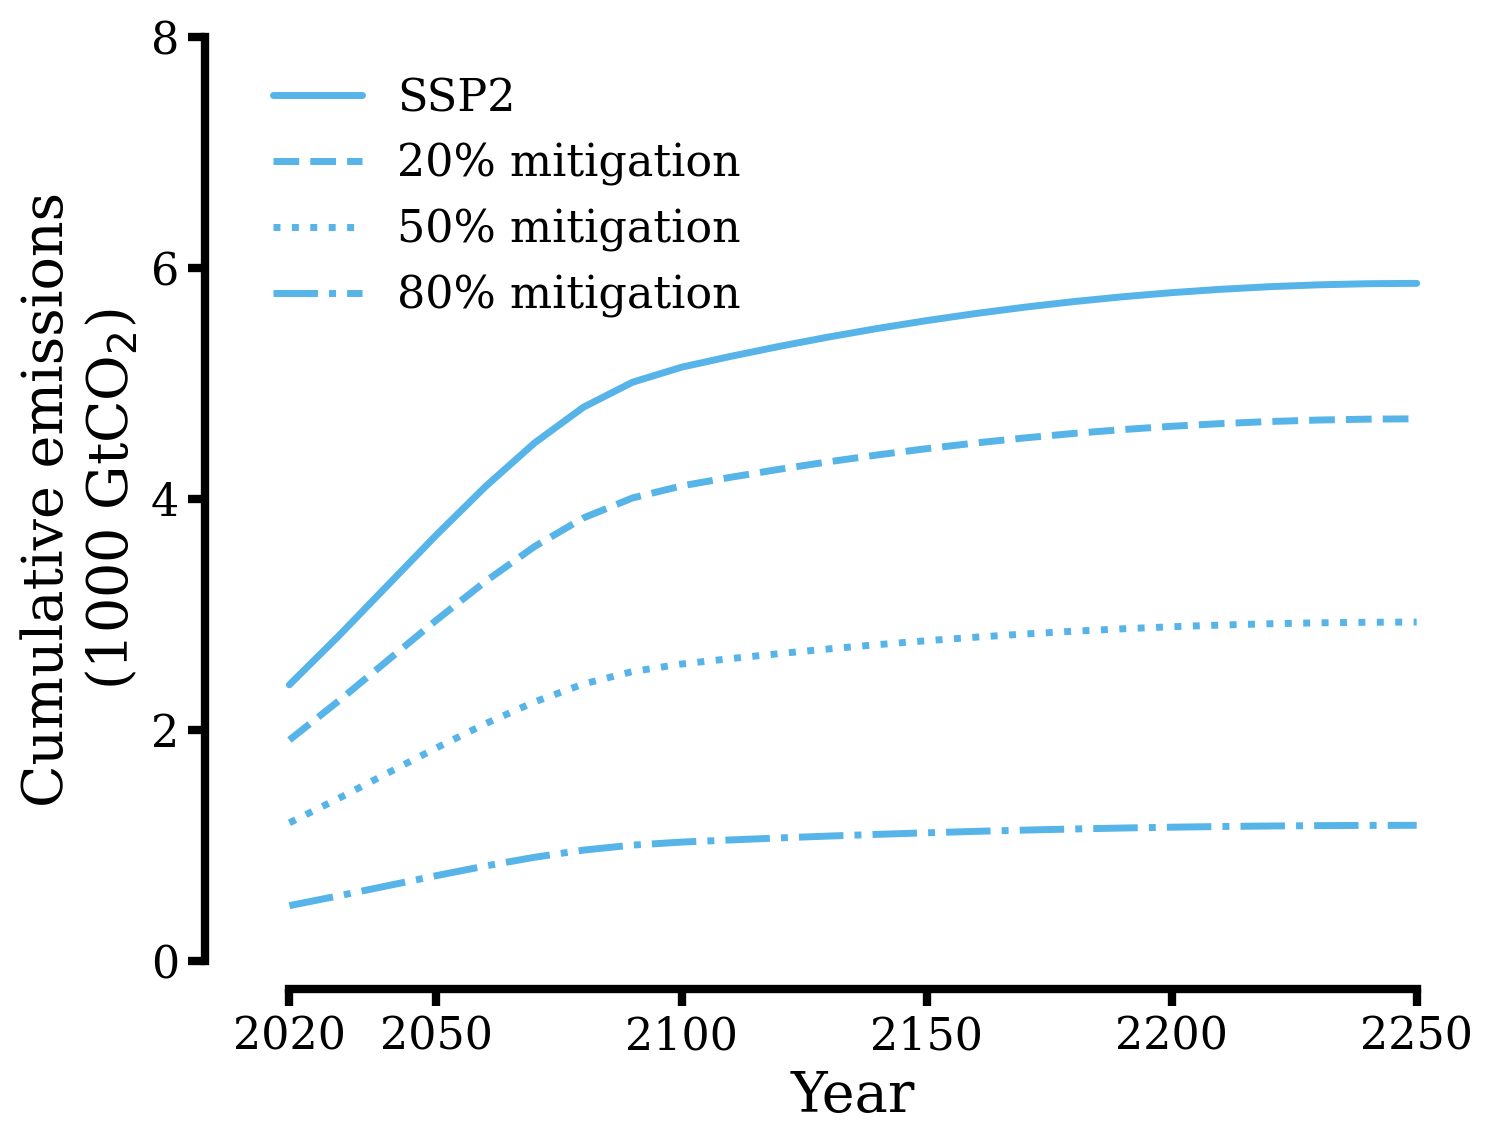

In [13]:
fig, ax = plt.subplots(1, figsize=(8,6))

t = np.arange(2020, 2260, 10)

ssp5_cind = 0
ssp4_cind = 6
ssp3_cind = 7
ssp2_cind = 2
ssp1_cind = 3

ax.plot(t, bau2.baseline_cumemit, label="SSP2", color=color_list[ssp2_cind], linestyle='solid')
ax.plot(t, bau2.baseline_cumemit * (1-0.2), label="20% mitigation", color=color_list[ssp2_cind], linestyle='dashed')
ax.plot(t, bau2.baseline_cumemit * (1-0.5), label="50% mitigation", color=color_list[ssp2_cind], linestyle='dotted')
ax.plot(t, bau2.baseline_cumemit * (1-0.8), label="80% mitigation", color=color_list[ssp2_cind], linestyle='dashdot')


ax.set_ylabel("Cumulative emissions\n(1000 GtCO$_2$)")
ax.set_xlabel("Year")
ax.legend()

ax.set_xticks([2020, 2050, 2100, 2150, 2200, 2250])
ax.set_yticks([0, 2, 4, 6, 8])

sns.despine(offset=10, trim=True)
#ax.vlines(2100, 0, 140)

#fig.savefig(''.join([basefile, 'baselines.png']), bbox_inches='tight', dpi=400)